In [25]:
import pandas_datareader.data as web
import datetime
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [26]:
start = datetime.datetime(2020,1,1)
end = datetime.datetime(2022,1,1)

In [28]:
tesla = web.DataReader("TSLA", 'yahoo',start,end)
ford = web.DataReader("F", 'yahoo',start,end)
gm = web.DataReader("GM", 'yahoo',start,end)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,86.139999,84.342003,84.900002,86.052002,47660500.0,86.052002
2020-01-03,90.800003,87.384003,88.099998,88.601997,88892500.0,88.601997
2020-01-06,90.311996,88.000000,88.094002,90.307999,50665000.0,90.307999
2020-01-07,94.325996,90.671997,92.279999,93.811996,89410500.0,93.811996
2020-01-08,99.697998,93.646004,94.739998,98.428001,155721500.0,98.428001


In [30]:
tesla['Open']

Date
2020-01-02      84.900002
2020-01-03      88.099998
2020-01-06      88.094002
2020-01-07      92.279999
2020-01-08      94.739998
                 ...     
2021-12-27    1073.670044
2021-12-28    1109.489990
2021-12-29    1098.640015
2021-12-30    1061.329956
2021-12-31    1073.439941
Name: Open, Length: 505, dtype: float64

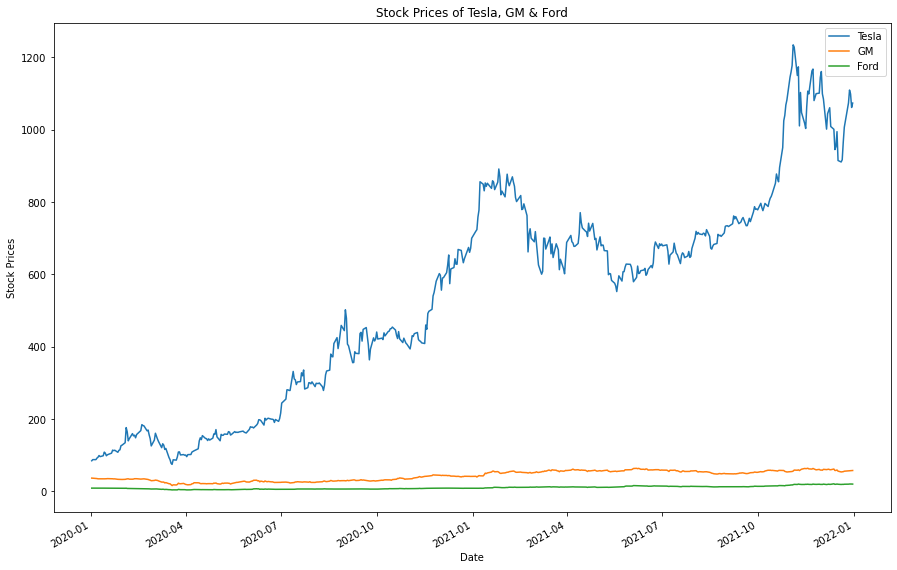

In [37]:
#visualizing the stock prices over a year
tesla['Open'].plot(label='Tesla', figsize=(15,10))
gm['Open'].plot(label='GM')
ford['Open'].plot(label='Ford')
plt.legend()
plt.ylabel('Stock Prices')
plt.title('Stock Prices of Tesla, GM & Ford')
plt.show()

Comparison of stocks 

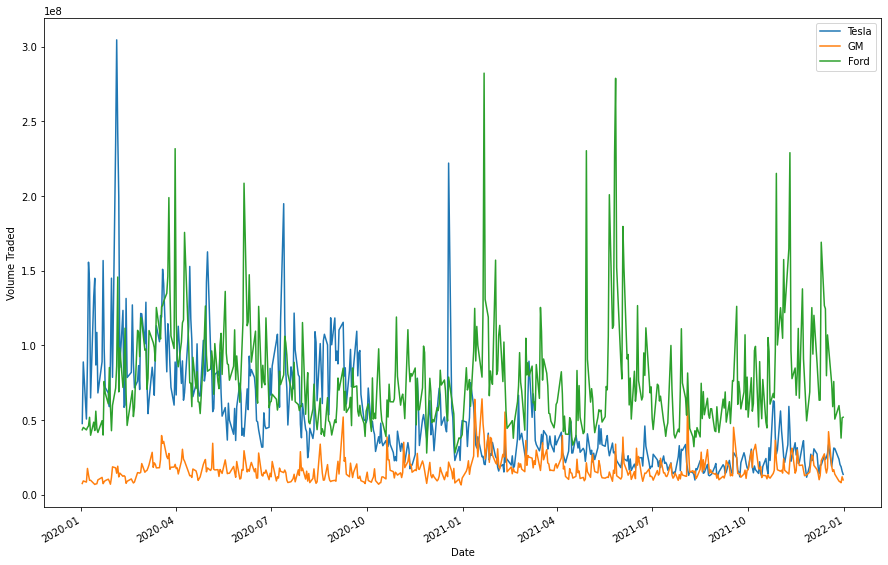

In [39]:
tesla['Volume'].plot(label='Tesla', figsize=(15,10))
gm['Volume'].plot(label='GM')
ford['Volume'].plot(label='Ford')
plt.ylabel('Volume Traded')
plt.legend()

In [41]:
tesla['Total Traded'] = tesla['Open'] * tesla['Volume']
gm['Total Traded'] = gm['Open'] * gm['Volume']
ford['Total Traded'] = ford['Open'] * ford['Volume']

In [42]:
tesla.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded
Date,,,,,,,
2020-01-02,86.139999,84.342003,84.900002,86.052002,47660500.0,86.052002,4.046377e+09
2020-01-03,90.800003,87.384003,88.099998,88.601997,88892500.0,88.601997,7.831429e+09
2020-01-06,90.311996,88.000000,88.094002,90.307999,50665000.0,90.307999,4.463283e+09
2020-01-07,94.325996,90.671997,92.279999,93.811996,89410500.0,93.811996,8.250801e+09
2020-01-08,99.697998,93.646004,94.739998,98.428001,155721500.0,98.428001,1.475305e+10


In [43]:
gm.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded
Date,,,,,,,
2020-01-02,37.380001,36.549999,37.000000,37.380001,7454400.0,36.929497,2.758128e+08
2020-01-03,36.919998,36.110001,36.730000,36.320000,9173000.0,35.882271,3.369243e+08
2020-01-06,36.180000,35.799999,35.950001,35.840000,8408200.0,35.408058,3.022748e+08
2020-01-07,35.840000,34.740002,35.750000,35.150002,17556800.0,34.726376,6.276556e+08
2020-01-08,35.200001,34.410000,35.040001,34.650002,13229400.0,34.232399,4.635582e+08


In [44]:
ford.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded
Date,,,,,,,
2020-01-02,9.42,9.19,9.29,9.42,43425700.0,9.168929,4.034248e+08
2020-01-03,9.37,9.15,9.31,9.21,45040800.0,8.964526,4.193299e+08
2020-01-06,9.17,9.06,9.10,9.16,43372300.0,8.915858,3.946879e+08
2020-01-07,9.25,9.12,9.20,9.25,44984100.0,9.003460,4.138537e+08
2020-01-08,9.30,9.17,9.23,9.25,45994900.0,9.003460,4.245329e+08


Text(0, 0.5, 'Total Traded')

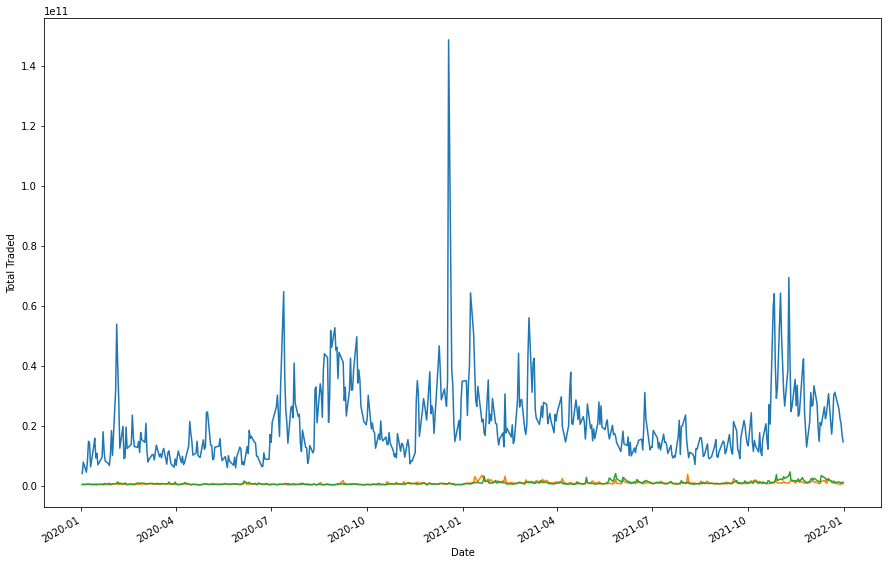

In [52]:
tesla['Total Traded'].plot(label='Tesla', figsize=(15,10))
gm['Total Traded'].plot(label='GM')
ford['Total Traded'].plot(label='Ford')
plt.ylabel('Total Traded')

In [54]:
#checking the maximum total traded for the spike on december end 
tesla['Total Traded'].argmax()

244

In [56]:
#this shows the on 18th December, 2020 was the maximum traded for Tesla
tesla.iloc[[tesla['Total Traded'].argmax()]]

# Tesla jumps 6% in heavy volume ahead of S&P 500 entry, stock then falls a bit in after hours on Dec 18th, 2020.

,High,Low,Open,Close,Volume,Adj Close,Total Traded
Date,,,,,,,
2020-12-18,695.0,628.539978,668.900024,695.0,222126200.0,695.0,1.485802e+11


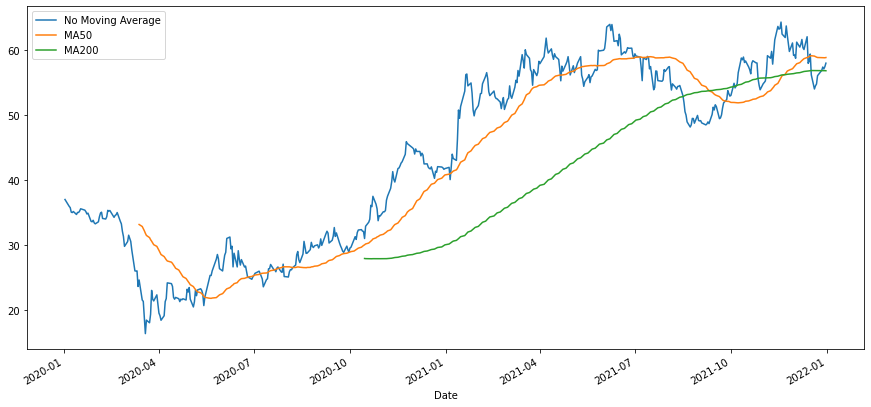

In [63]:
#looking at the moving average of the GM stock

gm['Open'].plot(label = 'No Moving Average', figsize=(15,7))
gm['MA50'] = gm['Open'].rolling(50).mean()
gm['MA50'].plot(label='MA50')

gm['MA200'] = gm['Open'].rolling(200).mean()
gm['MA200'].plot(label='MA200')
plt.legend()

In [66]:
#plotting correlation of the stocks

from pandas.plotting import scatter_matrix
import pandas as pd

In [68]:
car_comp = pd.concat([tesla['Open'],gm['Open'],ford['Open']],axis = 1)
car_comp.columns = ['Tesla Open', 'GM Open', 'Ford Open']

array([[<AxesSubplot:xlabel='Tesla Open', ylabel='Tesla Open'>,
        <AxesSubplot:xlabel='GM Open', ylabel='Tesla Open'>,
        <AxesSubplot:xlabel='Ford Open', ylabel='Tesla Open'>],
       [<AxesSubplot:xlabel='Tesla Open', ylabel='GM Open'>,
        <AxesSubplot:xlabel='GM Open', ylabel='GM Open'>,
        <AxesSubplot:xlabel='Ford Open', ylabel='GM Open'>],
       [<AxesSubplot:xlabel='Tesla Open', ylabel='Ford Open'>,
        <AxesSubplot:xlabel='GM Open', ylabel='Ford Open'>,
        <AxesSubplot:xlabel='Ford Open', ylabel='Ford Open'>]],
      dtype=object)

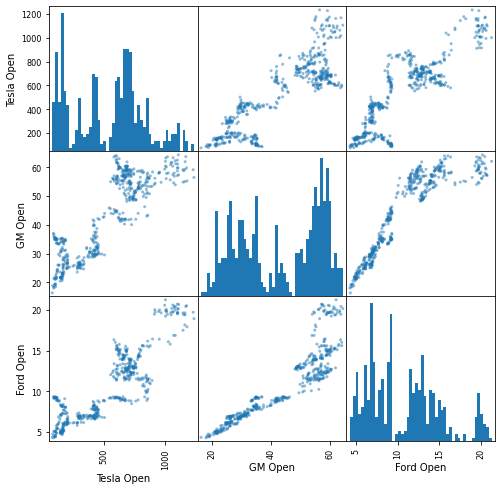

In [71]:
scatter_matrix(car_comp,figsize=(8,8),hist_kwds={'bins':50})

The correlation for GM Open vs Ford Open is linear in the beginning as shown in the first picture below, however, Ford Open vs GM Open seems to have a steep positive slope, so this indicates they are less correlated.

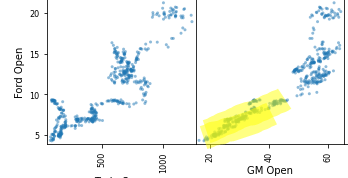

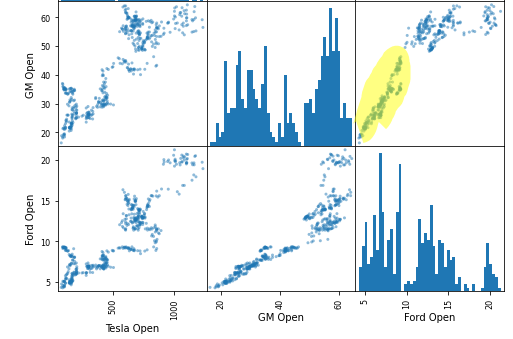

([<matplotlib.lines.Line2D at 0x1b91895fee0>,
  <matplotlib.patches.Rectangle at 0x1b919b4f580>])

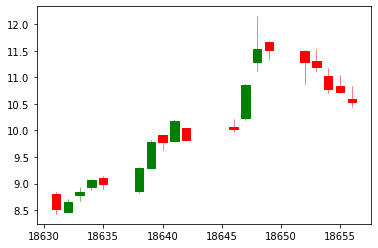

In [88]:
#plotting candlestick charts

from mpl_finance import candlestick_ohlc
from matplotlib.dates import DateFormatter, date2num, WeekdayLocator, DayLocator, MONDAY

ford_reset = ford.loc['2021-01':'2021-01'].reset_index()

ford_reset['date_ax'] = ford_reset['Date'].apply(lambda date: date2num(date))
ford_values = [tuple(vals) for vals in ford_reset[['date_ax', 'Open', 'High', 'Low', 'Close']].values]

mondays = WeekdayLocator(MONDAY)
alldays = DayLocator()
weekFormatter = DateFormatter('%b %d')
dayFormatter = DateFormatter('%d')

fig, ax = plt.subplots()
candlestick_ohlc(ax, ford_values,width = 0.7, colorup='g', colordown='r')

In [89]:
# calculating the daily percentage change 

tesla['returns'] = (tesla['Close']/tesla['Close'].shift(1)) - 1

In [90]:
tesla.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,returns
Date,,,,,,,,
2020-01-02,86.139999,84.342003,84.900002,86.052002,47660500.0,86.052002,4.046377e+09,NaN
2020-01-03,90.800003,87.384003,88.099998,88.601997,88892500.0,88.601997,7.831429e+09,0.029633
2020-01-06,90.311996,88.000000,88.094002,90.307999,50665000.0,90.307999,4.463283e+09,0.019255
2020-01-07,94.325996,90.671997,92.279999,93.811996,89410500.0,93.811996,8.250801e+09,0.038801
2020-01-08,99.697998,93.646004,94.739998,98.428001,155721500.0,98.428001,1.475305e+10,0.049205


In [91]:
gm['returns'] = (gm['Close']/gm['Close'].shift(1)) - 1

In [92]:
gm.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,MA50,MA200,returns
Date,,,,,,,,,,
2020-01-02,37.380001,36.549999,37.000000,37.380001,7454400.0,36.929497,2.758128e+08,NaN,NaN,NaN
2020-01-03,36.919998,36.110001,36.730000,36.320000,9173000.0,35.882271,3.369243e+08,NaN,NaN,-0.028357
2020-01-06,36.180000,35.799999,35.950001,35.840000,8408200.0,35.408058,3.022748e+08,NaN,NaN,-0.013216
2020-01-07,35.840000,34.740002,35.750000,35.150002,17556800.0,34.726376,6.276556e+08,NaN,NaN,-0.019252
2020-01-08,35.200001,34.410000,35.040001,34.650002,13229400.0,34.232399,4.635582e+08,NaN,NaN,-0.014225


In [93]:
ford['returns'] = (ford['Close']/ford['Close'].shift(1)) - 1
ford.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,returns
Date,,,,,,,,
2020-01-02,9.42,9.19,9.29,9.42,43425700.0,9.168929,4.034248e+08,NaN
2020-01-03,9.37,9.15,9.31,9.21,45040800.0,8.964526,4.193299e+08,-0.022293
2020-01-06,9.17,9.06,9.10,9.16,43372300.0,8.915858,3.946879e+08,-0.005429
2020-01-07,9.25,9.12,9.20,9.25,44984100.0,9.003460,4.138537e+08,0.009825
2020-01-08,9.30,9.17,9.23,9.25,45994900.0,9.003460,4.245329e+08,0.000000


<AxesSubplot:>

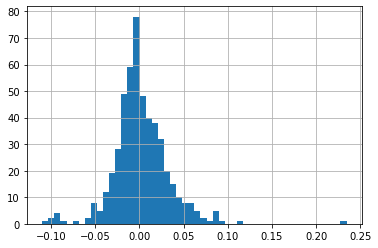

In [94]:
ford['returns'].hist(bins=50)

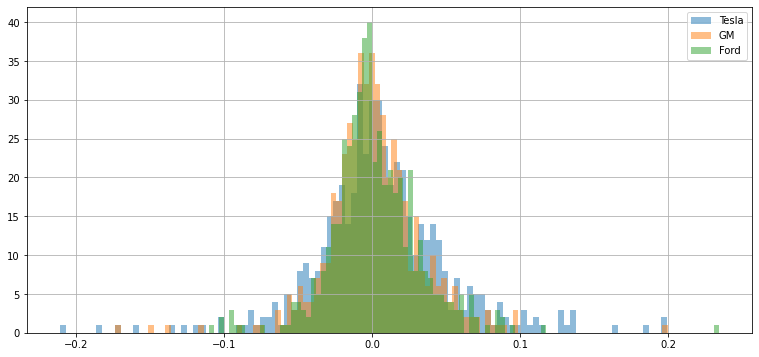

In [99]:
#checking volatility of stocks
tesla['returns'].hist(bins=100,label='Tesla',alpha=0.5, figsize = (13,6))
gm['returns'].hist(bins=100,label='GM',alpha=0.5)
ford['returns'].hist(bins=100,label='Ford',alpha=0.5)
plt.legend()

From this we can see that Ford is the most volatile stock, with GM being the 2nd volatime and Tesla is the least volatile.

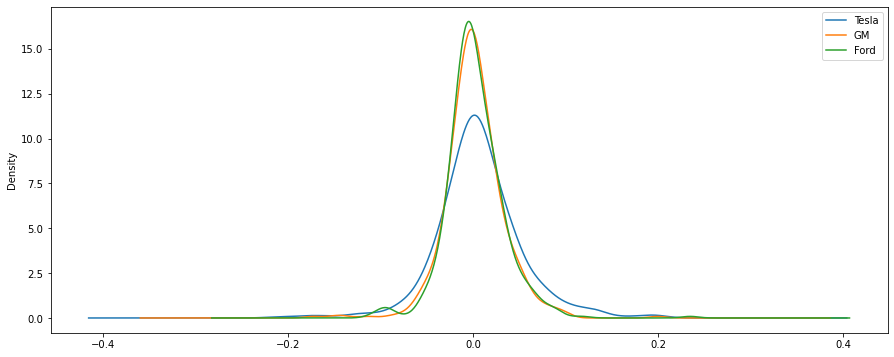

In [102]:
tesla['returns'].plot(kind='kde',label='Tesla',figsize = (15,6))
gm['returns'].plot(kind='kde',label='GM')
ford['returns'].plot(kind='kde',label='Ford')
plt.legend()

Based on the kde curve, you can see that Ford and GM are more stable compared to Tesla.

<AxesSubplot:>

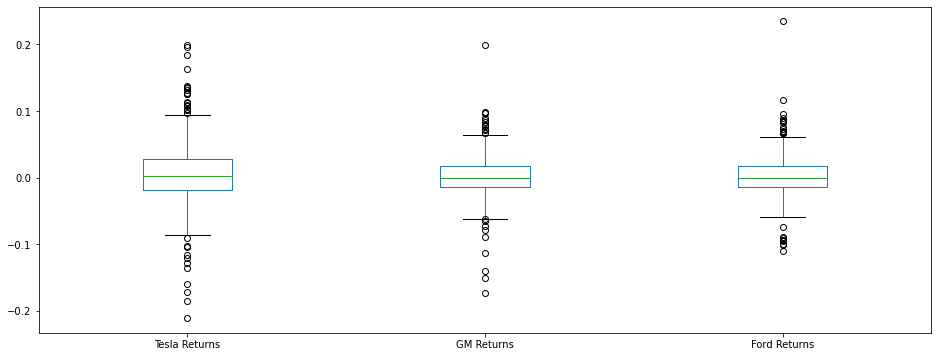

In [104]:
#plotting box plots

box_df = pd.concat([tesla['returns'],gm['returns'],ford['returns']],axis = 1)
box_df.columns=['Tesla Returns', 'GM Returns', 'Ford Returns']
box_df.plot(kind='box',figsize=(16,6))

The daily percentage return for Tesla is more spread, hence its more volatime compared to GM and Ford.

array([[<AxesSubplot:xlabel='Tesla Returns', ylabel='Tesla Returns'>,
        <AxesSubplot:xlabel='GM Returns', ylabel='Tesla Returns'>,
        <AxesSubplot:xlabel='Ford Returns', ylabel='Tesla Returns'>],
       [<AxesSubplot:xlabel='Tesla Returns', ylabel='GM Returns'>,
        <AxesSubplot:xlabel='GM Returns', ylabel='GM Returns'>,
        <AxesSubplot:xlabel='Ford Returns', ylabel='GM Returns'>],
       [<AxesSubplot:xlabel='Tesla Returns', ylabel='Ford Returns'>,
        <AxesSubplot:xlabel='GM Returns', ylabel='Ford Returns'>,
        <AxesSubplot:xlabel='Ford Returns', ylabel='Ford Returns'>]],
      dtype=object)

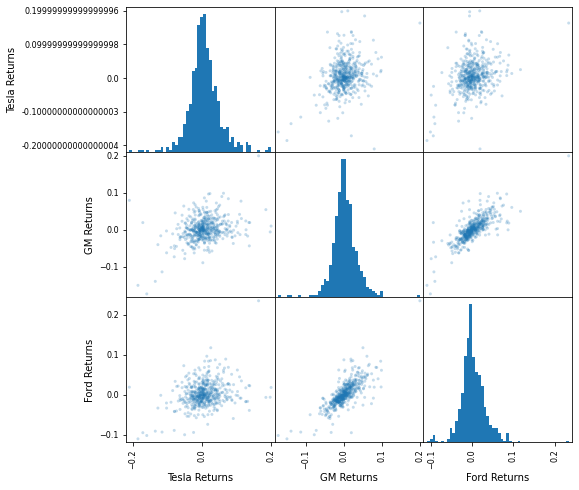

In [109]:
scatter_matrix(box_df,figsize=(8,8),hist_kwds={'bins':50}, alpha=0.25)

In [116]:
#calculating cumulative return

tesla['Cumulative Return'] = (1 + tesla['returns']).cumprod()
gm['Cumulative Return'] = (1 + gm['returns']).cumprod()
ford['Cumulative Return'] = (1 + ford['returns']).cumprod()

tesla.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,returns,Cumulative Return
Date,,,,,,,,,
2020-01-02,86.139999,84.342003,84.900002,86.052002,47660500.0,86.052002,4.046377e+09,NaN,NaN
2020-01-03,90.800003,87.384003,88.099998,88.601997,88892500.0,88.601997,7.831429e+09,0.029633,1.029633
2020-01-06,90.311996,88.000000,88.094002,90.307999,50665000.0,90.307999,4.463283e+09,0.019255,1.049458
2020-01-07,94.325996,90.671997,92.279999,93.811996,89410500.0,93.811996,8.250801e+09,0.038801,1.090178
2020-01-08,99.697998,93.646004,94.739998,98.428001,155721500.0,98.428001,1.475305e+10,0.049205,1.143820


In [117]:
gm.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,MA50,MA200,returns,Cumulative Return
Date,,,,,,,,,,,
2020-01-02,37.380001,36.549999,37.000000,37.380001,7454400.0,36.929497,2.758128e+08,NaN,NaN,NaN,NaN
2020-01-03,36.919998,36.110001,36.730000,36.320000,9173000.0,35.882271,3.369243e+08,NaN,NaN,-0.028357,0.971643
2020-01-06,36.180000,35.799999,35.950001,35.840000,8408200.0,35.408058,3.022748e+08,NaN,NaN,-0.013216,0.958801
2020-01-07,35.840000,34.740002,35.750000,35.150002,17556800.0,34.726376,6.276556e+08,NaN,NaN,-0.019252,0.940342
2020-01-08,35.200001,34.410000,35.040001,34.650002,13229400.0,34.232399,4.635582e+08,NaN,NaN,-0.014225,0.926966


In [118]:
ford.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,returns,Cumulative Return
Date,,,,,,,,,
2020-01-02,9.42,9.19,9.29,9.42,43425700.0,9.168929,4.034248e+08,NaN,NaN
2020-01-03,9.37,9.15,9.31,9.21,45040800.0,8.964526,4.193299e+08,-0.022293,0.977707
2020-01-06,9.17,9.06,9.10,9.16,43372300.0,8.915858,3.946879e+08,-0.005429,0.972399
2020-01-07,9.25,9.12,9.20,9.25,44984100.0,9.003460,4.138537e+08,0.009825,0.981953
2020-01-08,9.30,9.17,9.23,9.25,45994900.0,9.003460,4.245329e+08,0.000000,0.981953


Text(0.5, 1.0, 'Cumulative Return vs Time')

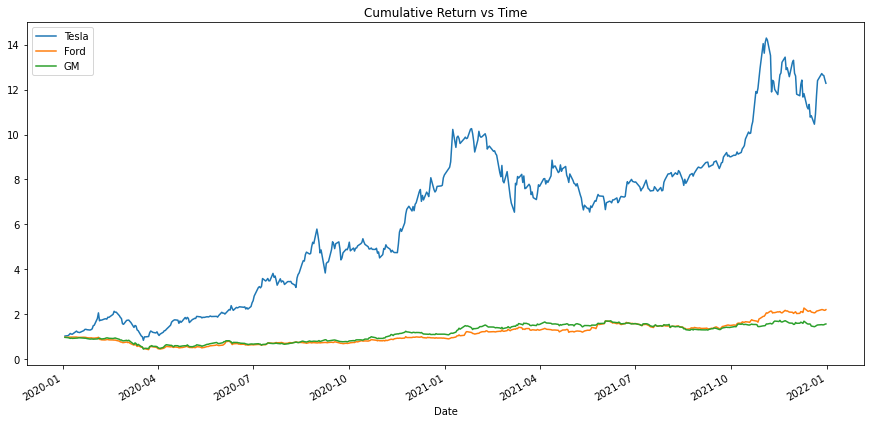

In [115]:
tesla['Cumulative Return'].plot(label='Tesla',figsize=(15,7))
ford['Cumulative Return'].plot(label='Ford')
gm['Cumulative Return'].plot(label='GM')
plt.legend()
plt.title('Cumulative Return vs Time')

The graph above shows that if someone invested in Tesla back in 2020 at the start of the pandemic they would have made a big return compared to Ford and GM which has stayed relatively stable consistent over the course of pandemic.